In [1]:
if 'google.colab' in str(get_ipython()):
    import sys
    from google.colab import drive, output
    drive.mount('/content/drive')
    !pip install -U encodec
    !pip install torchaudio
    !pip install wandb --upgrade
    # !wandb login
    !pip install umap-learn
    !pip install umap-learn[plot]
    !pip install holoviews
    !pip install -U ipykernel
    !pip install torchvggish==0.1
    # !pip install umap-learn
    output.clear()
    print("Running on colab")
    %load_ext autoreload
    %autoreload 1
    %cd '/content/drive/MyDrive/PhD_Thesis_Experiments/DeepLearning/AutoEncoders/Project'
    #sys.path.append('/content/drive/MyDrive/Deep Learning/AutoEncoders/Project/VQVAE_Working/data')
    #sys.path.append('/content/drive/MyDrive/Deep Learning/AutoEncoders/Project/VQVAE_Working/models')
    sys.path.append('/content/drive/MyDrive/PhD_Thesis_Experiments/Jaguas_2018')

elif "zmqshell" in str(get_ipython()):
    print("Running on MIRP")
else:
    import pathlib
    temp = pathlib.PosixPath
    pathlib.PosixPath = pathlib.WindowsPath
    print("Running local")

MessageError: ignored

In [ ]:
import numpy as np
from encodec import EncodecModel
from encodec.utils import convert_audio
import torchaudio
import torch
import os
from pathlib import Path
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 1
%cd '/content/drive/MyDrive/PhD_Thesis_Experiments/DeepLearning/AutoEncoders/Project'
sys.path.append('/content/drive/MyDrive/PhD_Thesis_Experiments/DeepLearning/AutoEncoders/Project/Dataloader')
sys.path.append('/content/drive/MyDrive/PhD_Thesis_Experiments/DeepLearning/AutoEncoders/Project/Clustering_Results/Results')
sys.path.append('/content/drive/MyDrive/PhD_Thesis_Experiments/DeepLearning/AutoEncoders/Project/Clustering_Results/Figures')
sys.path.append('/content/drive/MyDrive/PhD_Thesis_Experiments/DeepLearning/AutoEncoders/Project/Clustering_Result')
root_path = '/content/drive/Shareddrives/ConservacionBiologicaIA/Datos/Jaguas_2018/'

folders = os.listdir(root_path)
files=[]
for i in range(len(folders)):
    path_aux = "{}/{}".format(root_path, folders[i])
    files += list(Path(path_aux).rglob("*.{}".format("wav")))
file = str(files[16])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/content/drive/MyDrive/PhD_Thesis_Experiments/DeepLearning/AutoEncoders/Project


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Downloading: "https://github.com/harritaylor/torchvggish/releases/download/v0.1/vggish_pca_params-970ea276.pth" to /root/.cache/torch/hub/checkpoints/vggish_pca_params-970ea276.pth


  0%|          | 0.00/177k [00:00<?, ?B/s]

Downloading: "https://github.com/harritaylor/torchvggish/releases/download/v0.1/vggish-10086976.pth" to /root/.cache/torch/hub/checkpoints/vggish-10086976.pth


  0%|          | 0.00/275M [00:00<?, ?B/s]

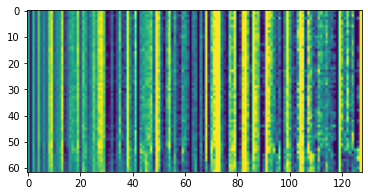

In [ ]:
!pip install torchvggish==0.1
from torchvggish import vggish, vggish_input

# Initialise model and download weights
embedding_model = vggish()
embedding_model.eval()

example = vggish_input.wavfile_to_examples(file)
embeddings = embedding_model.forward(example)
embeddings.detach().numpy().shape
plt.imshow(embeddings.detach().numpy())

In [ ]:
from torch.utils.data import DataLoader
root = "/content/drive/MyDrive/PhD_Thesis_Experiments/DeepLearning/AutoEncoders/Project"
dataset_test = torch.load(f'{root}/temporal/dataset_test_ae_jaguas_new.pth')
dataset_train = torch.load(f'{root}/temporal/dataset_train_ae_jaguas_new.pth')
training_loader = DataLoader(dataset_train, batch_size=1)
test_loader = DataLoader(dataset_test, batch_size=1)
iterator = iter(training_loader)

training_recorder_list = []
training_hour_list = []
training_minute_list = []
delete_samples = []

In [ ]:
a = np.ones([1,20])
b = np.zeros([1,4])
c =np.append(a,b, axis=1)
c

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 0., 0., 0., 0.]])

In [ ]:
def fileToRecord(file, audio_lenght=12, resampling=22050, original_length=60):
    record, sr = torchaudio.load(file)
    audio_len = audio_lenght*resampling
    record = torch.mean(record, dim=0, keepdim=True)
    record = torchaudio.transforms.Resample(sr, resampling)(record)
    missing_padding = resampling * original_length - record.shape[1]
    padding = torch.zeros([1, missing_padding])
    record = torch.cat((record, padding), axis=1)
    print(record.shape[1]/resampling, missing_padding)
    record = record[:, :audio_len*(record.shape[1] // audio_len)]
    record = torch.reshape(record, (record.shape[1] // audio_len, audio_len))
    print(record.shape)
    record = record[0]
    return record
    

In [ ]:
record.shape

torch.Size([264600])

In [ ]:
record = fileToRecord(file)

60.0 120
torch.Size([5, 264600])


In [ ]:
(b==record).all()

tensor([[False, False, False,  ..., False, False, False]])

In [ ]:
iterator = iter(training_loader)
a,b,c = next(iterator)
a,b,c = next(iterator)
a,b,c = next(iterator)
a,b,c = next(iterator)

In [ ]:
for id, item in enumerate(dataset_train):
    index = training_loader.dataset.indices[id]
    file = str(files[index])
    record = fileToRecord(file)


    print(item.index)

<built-in method index of str object at 0x7f340f72ee30>
<built-in method index of str object at 0x7f340f6f4330>
<built-in method index of str object at 0x7f340f6f4370>
<built-in method index of str object at 0x7f340f656e30>
<built-in method index of str object at 0x7f340f6f1bf0>
<built-in method index of str object at 0x7f340f647d70>
<built-in method index of str object at 0x7f340f656e30>
<built-in method index of str object at 0x7f340f6f1bf0>
<built-in method index of str object at 0x7f340f72ee30>
<built-in method index of str object at 0x7f340f6f4230>
<built-in method index of str object at 0x7f340f6bd9f0>
<built-in method index of str object at 0x7f340f731bb0>
<built-in method index of str object at 0x7f340f68ddb0>
<built-in method index of str object at 0x7f340f647d70>
<built-in method index of str object at 0x7f340f72ee30>
<built-in method index of str object at 0x7f340f63f130>
<built-in method index of str object at 0x7f340f65b8b0>
<built-in method index of str object at 0x7f340f

In [ ]:
training_loader.dataset.indices

[4725,
 8750,
 723,
 15,
 6143,
 4386,
 17869,
 9375,
 10166,
 9673,
 7745,
 16509,
 12150,
 19426,
 16225,
 18302,
 2494,
 17838,
 1203,
 5780,
 15128,
 9054,
 10080,
 19388,
 14629,
 2696,
 17766,
 9022,
 10083,
 7807,
 6737,
 15797,
 19637,
 7946,
 11150,
 19538,
 18533,
 12526,
 6379,
 19221,
 8667,
 11299,
 19597,
 10211,
 13494,
 12638,
 12628,
 3893,
 12768,
 4044,
 5187,
 12817,
 1764,
 2029,
 16982,
 5024,
 9482,
 15743,
 6417,
 5464,
 17607,
 12081,
 11997,
 6567,
 16897,
 7019,
 17321,
 11996,
 13294,
 8049,
 10317,
 2010,
 8518,
 9807,
 19373,
 13647,
 12187,
 9973,
 12204,
 7539,
 13773,
 18765,
 7773,
 19961,
 3088,
 12304,
 916,
 17198,
 4840,
 11562,
 8175,
 1656,
 19840,
 14488,
 2049,
 12200,
 8962,
 19063,
 4952,
 14086,
 1850,
 13807,
 18676,
 14071,
 3918,
 5206,
 2173,
 576,
 16081,
 12563,
 8290,
 13262,
 14371,
 8772,
 18229,
 14817,
 14950,
 16272,
 9934,
 16497,
 12598,
 12430,
 8530,
 1299,
 18807,
 12378,
 6932,
 2565,
 18155,
 11414,
 3431,
 1999,
 9143,
 1

In [ ]:
for id, item in enumerate(dataset_train.dataset.):
    if (id+1)% 5 == 0:
        print("entro")
        break
    if id% 500 == 0:
        print(f"id: {id + 1} of {len(dataset_train)}")
    try:
        spec, wav, label = next(iterator)
    except:
        print(f"iterator broken in index {id}")
        continue
    wav = wav.unsqueeze(0)
    with torch.no_grad():
        codes = model.encoder(wav)
    print(codes.shape)
    encodings = torch.reshape(codes,(codes.shape[0], codes.shape[1]*codes.shape[2]))
    print(encodings.shape)
    training_samples_list_torch[id] = encodings[0]
    training_recorder_list.append(label["recorder"])
    training_hour_list.append(label["hour"])
    training_minute_list.append(label["minute"])

print(f"------------------------------------\n{id}\nProcess finished\nSaving data\n------------------------------------")
torch.save(training_samples_list_torch, "training_samples_list_torch_vggish_feats.pth")
torch.save(training_recorder_list, "training_recorder_list_vggish_feats.pth")
torch.save(training_hour_list, "training_hour_list_vggish_feats.pth")
torch.save(training_minute_list, "training_minute_list_vggish_feats.pth")
training_labels_list = {"recorder": training_recorder_list, "hour": training_hour_list, "minute": training_minute_list}
torch.save(training_labels_list, "training_labels_list_vggish_feats.pth")

id: 1 of 6020


NameError: ignored